## What does this notebook do?

Experiment 2:

Iterative pruning and finetuning with 0.1 sparsity for each round.
6 rounds of finetuning was done

For experiment 2:
- Plotting validation accuracy on training over 5 rounds of iterative pruning and finetuning

Make chart with x-axis as % pruned, y axis acc
Make chart with acc curve for training/pruning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
log_valid_acc_csv_dir = "log/coco/transpose_r_chsel/jupyter"
finetune1_csv_path = os.path.join(log_valid_acc_csv_dir, "exp2_step1_finetune_valid_acc.csv")
finetune2_csv_path = os.path.join(log_valid_acc_csv_dir, "exp2_step2_finetune_valid_acc.csv")
finetune3_csv_path = os.path.join(log_valid_acc_csv_dir, "exp2_step3_finetune_valid_acc.csv")
finetune4_csv_path = os.path.join(log_valid_acc_csv_dir, "exp2_step4_finetune_valid_acc.csv")
finetune5_csv_path = os.path.join(log_valid_acc_csv_dir, "exp2_step5_finetune_valid_acc.csv")
finetune6_csv_path = os.path.join(log_valid_acc_csv_dir, "exp2_step6_finetune_valid_acc.csv")

finetune_1_acc = pd.read_csv(finetune1_csv_path)
finetune_2_acc = pd.read_csv(finetune2_csv_path)
finetune_3_acc = pd.read_csv(finetune3_csv_path)
finetune_4_acc = pd.read_csv(finetune4_csv_path)
finetune_5_acc = pd.read_csv(finetune5_csv_path)
finetune_6_acc = pd.read_csv(finetune6_csv_path)

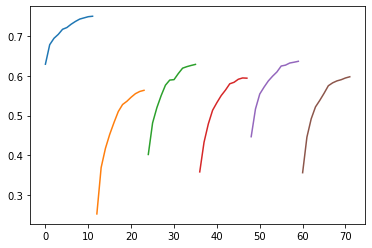

In [3]:
plt.plot(finetune_1_acc['Step'], finetune_1_acc['Value'])
plt.plot(finetune_2_acc['Step']+12, finetune_2_acc['Value'])
plt.plot(finetune_3_acc['Step']+24, finetune_3_acc['Value'])
plt.plot(finetune_4_acc['Step']+36, finetune_4_acc['Value'])
plt.plot(finetune_5_acc['Step']+12*4, finetune_5_acc['Value'])
plt.plot(finetune_6_acc['Step']+12*5, finetune_6_acc['Value'])

In [4]:
import numpy as np

In [5]:
prune_0 = np.asarray([64, 64, 64, 64, 64, 64, 128, 128, 128, 128, 128, 128, 128, 128])
prune_1 = np.asarray([39, 46, 51, 63, 63, 64, 125, 128,  75, 124, 118, 128, 115, 128])
prune_2 = np.asarray([36, 44, 51, 62, 63, 64, 125, 128,  69, 122, 116, 127, 113, 126])
prune_3 = np.asarray([21, 44, 42, 62, 62, 64, 122, 128,  37, 122, 105, 127, 101, 126])
prune_4 = np.asarray([10, 44, 42, 62, 62, 64, 122, 128,  23, 122,  98, 127,  92, 126])
prune_5 = np.asarray([ 7, 44, 36, 62, 61, 64, 119, 128,  10, 122,  88, 127,  81, 126])
prune_6 = np.asarray([ 3, 44, 36, 62, 61, 64, 119, 128,   4, 122,  81, 127,  73, 126])

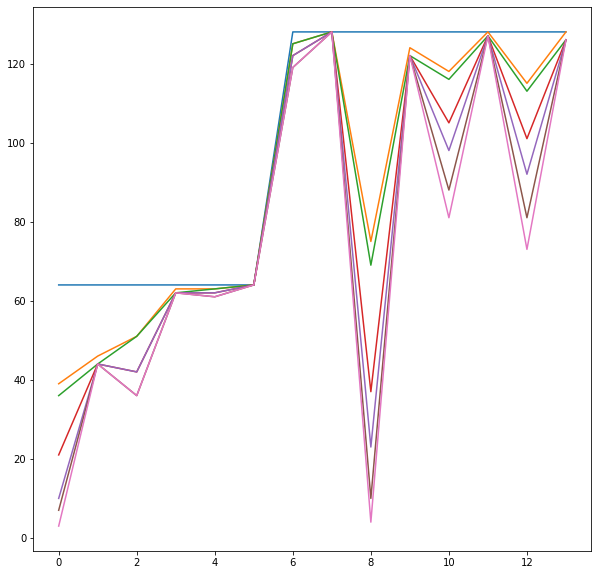

In [6]:
fig, axs = plt.subplots(figsize=(10,10))
plt.plot(prune_0)
plt.plot(prune_1)
plt.plot(prune_2)
plt.plot(prune_3)
plt.plot(prune_4)
plt.plot(prune_5)
plt.plot(prune_6)

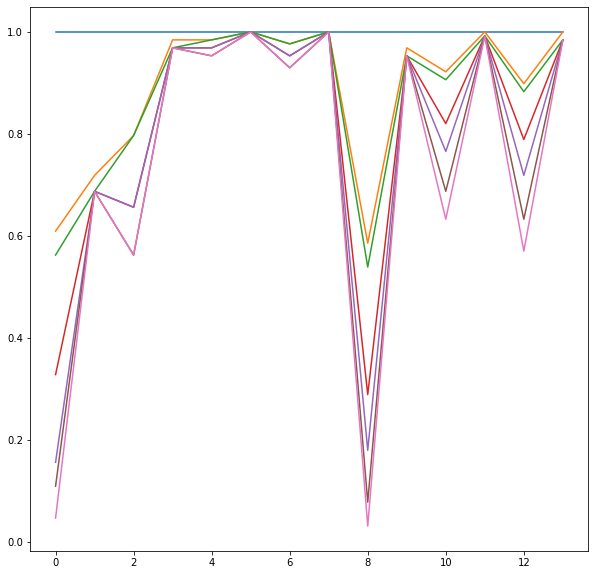

In [7]:
fig, axs = plt.subplots(figsize=(10,10))
plt.plot(prune_0/prune_0)
plt.plot(prune_1/prune_0)
plt.plot(prune_2/prune_0)
plt.plot(prune_3/prune_0)
plt.plot(prune_4/prune_0)
plt.plot(prune_5/prune_0)
plt.plot(prune_6/prune_0)

In [8]:
from tptools import _init_paths
import argparse
from config import cfg
from config import update_config
from utils.utils import create_logger
import pprint

In [9]:
import torch
import torch.backends.cudnn as cudnn


In [10]:
import models
import dataset
import torchvision.transforms as transforms

/media/abhishek/data/college/thesis/thesis_with_dr_duc/conda_envs/dlpruning5/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
from utils.utils import get_model_summary

In [12]:
def parse_args(args___):
    parser = argparse.ArgumentParser(description='Train keypoints network')
    parser.add_argument('--cfg',
                        help='experiment configure file name',
                        required=True,
                        type=str)


    parser.add_argument('opts',
                        help="Modify config options using the command-line",
                        default=None,
                        nargs=argparse.REMAINDER)

    parser.add_argument('--modelDir',
                    help='model directory',
                    type=str,
                    default='')

    parser.add_argument('--logDir',
                    help='log directory',
                type=str,
                default='')
    parser.add_argument('--dataDir',
                        help='data directory',
                        type=str,
                        default='')
    
    args = parser.parse_args(args___)
    return args

In [13]:
config_file_path = 'experiments/coco/transpose_r/exp2/exp2_step1_prune.yaml'
args = parse_args(['--cfg', config_file_path, 'TEST.USE_GT_BBOX', 'True'])
update_config(cfg, args)

In [14]:
logger, final_output_dir, tb_log_dir = create_logger(cfg, args.cfg, 'valid')

logger.info(pprint.pformat(args))
logger.info(cfg)

Namespace(cfg='experiments/coco/transpose_r/exp2/exp2_step1_prune.yaml', opts=['TEST.USE_GT_BBOX', 'True'], modelDir='', logDir='', dataDir='')
AUTO_RESUME: True
CUDNN:
  BENCHMARK: True
  DETERMINISTIC: False
  ENABLED: True
DATASET:
  COLOR_RGB: True
  DATASET: coco
  DATA_FORMAT: jpg
  FLIP: True
  HYBRID_JOINTS_TYPE: 
  NUM_JOINTS_HALF_BODY: 8
  PROB_HALF_BODY: 0.3
  ROOT: data/coco/
  ROT_FACTOR: 45
  SCALE_FACTOR: 0.35
  SELECT_DATA: False
  TEST_SET: val2017
  TRAIN_SET: train2017
DATA_DIR: 
DEBUG:
  DEBUG: False
  SAVE_BATCH_IMAGES_GT: True
  SAVE_BATCH_IMAGES_PRED: True
  SAVE_HEATMAPS_GT: True
  SAVE_HEATMAPS_PRED: True
GPUS: (0,)
LOG_DIR: log
LOSS:
  TOPK: 8
  USE_DIFFERENT_JOINTS_WEIGHT: False
  USE_OHKM: False
  USE_TARGET_WEIGHT: True
MODEL:
  ATTENTION_ACTIVATION: relu
  BOTTLENECK_NUM: 0
  DIM_FEEDFORWARD: 1024
  DIM_MODEL: 256
  ENCODER_LAYERS: 4
  EXTRA:
    DECONV_WITH_BIAS: False
    FINAL_CONV_KERNEL: 1
    NUM_DECONV_FILTERS: [256]
    NUM_DECONV_KERNELS: [4]
    

=> creating output/coco/transpose_r_chsel/exp2_step1_prune
=> creating log/coco/transpose_r_chsel/exp2_step1_prune_2024-06-25-16-29


In [15]:
cudnn.benchmark = cfg.CUDNN.BENCHMARK
torch.backends.cudnn.deterministic = cfg.CUDNN.DETERMINISTIC
torch.backends.cudnn.enabled = cfg.CUDNN.ENABLED


In [16]:
model = eval('models.'+cfg.MODEL.NAME+'.get_pose_net')(
    cfg, is_train=False
)
model.init_weights(cfg.TEST.MODEL_FILE)

==> Add Sine PositionEmbedding~
=> init final conv weights from normal distribution
=> init .weight as normal(0, 0.001)
=> init .bias as 0
=> loading pretrained model models/pytorch/transpose_coco/tp_r_256x192_enc4_d256_h1024_mh8.pth


:: pos_embedding is loaded from models/pytorch/transpose_coco/tp_r_256x192_enc4_d256_h1024_mh8.pth
:: conv1.weight is loaded from models/pytorch/transpose_coco/tp_r_256x192_enc4_d256_h1024_mh8.pth
:: bn1.weight is loaded from models/pytorch/transpose_coco/tp_r_256x192_enc4_d256_h1024_mh8.pth
:: bn1.bias is loaded from models/pytorch/transpose_coco/tp_r_256x192_enc4_d256_h1024_mh8.pth
:: bn1.running_mean is loaded from models/pytorch/transpose_coco/tp_r_256x192_enc4_d256_h1024_mh8.pth
:: bn1.running_var is loaded from models/pytorch/transpose_coco/tp_r_256x192_enc4_d256_h1024_mh8.pth
:: bn1.num_batches_tracked is loaded from models/pytorch/transpose_coco/tp_r_256x192_enc4_d256_h1024_mh8.pth
:: layer1.0.conv1.weight is loaded from models/pytorch/transpose_coco/tp_r_256x192_enc4_d256_h1024_mh8.pth
:: layer1.0.bn1.weight is loaded from models/pytorch/transpose_coco/tp_r_256x192_enc4_d256_h1024_mh8.pth
:: layer1.0.bn1.bias is loaded from models/pytorch/transpose_coco/tp_r_256x192_enc4_d256_

In [17]:
# from compute_flops.py
normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
    )

In [18]:
dataset = eval('dataset.'+cfg.DATASET.DATASET)(
        cfg, cfg.DATASET.ROOT, cfg.DATASET.TEST_SET, False,
        transforms.Compose([
            transforms.ToTensor(),
            normalize,
        ])
    )

loading annotations into memory...


=> classes: ['__background__', 'person']
=> num_images: 5000


Done (t=0.31s)
creating index...
index created!


=> load 6352 samples


In [19]:
images = []
for idx in range(16):
    img, _, _, _ = dataset[idx]
    images.append(img.numpy())
    # print(img.shape)

images = torch.tensor(np.asarray(images))

In [20]:
model = model.to('cuda:0')
images = images.to('cuda:0')

In [23]:
torch.cuda.memory_allocated() / 100000


419.64032

In [21]:
print(get_model_summary(model, images, verbose=True))

summary: 1  33444352
summary: 2  33444352
summary: 3  33444352
summary: 4  33444352
summary: 5  41964032
summary: 6  41964032
Model Summary
Name                      Input Size                Output Size               Parameters                Multiply Adds (Flops)     
----------------------------------------------------------------------------------------------------------------------------------
Conv2d_1                  [16, 3, 256, 192]         [0, 0]                    9408                      115605504                 
----------------------------------------------------------------------------------------------------------------------------------
BatchNorm2d_1             [16, 64, 128, 96]         [0, 0]                    128                       Not Available             
----------------------------------------------------------------------------------------------------------------------------------
ReLU_1                    [16, 64, 128, 96]         [0, 0]                

In [ ]:
l_i = 0
for l in model.named_modules():
    skip = False
    l_i += 1
    # print(type(l[1]))
    if l_i > 1 and not 'relu' in l[0].lower() and not 'maxpool' in l[0]:
        for skip_layer in skip_layer_types:
            if isinstance(l[1], skip_layer):
                skip = True

        if skip:
            continue
        # if  isinstance(l[1], torch.nn.modules.container.Sequential):
        #     continue
        # # if  isinstance(l[1], models.resnet.BasicBlock):
        # #     continue
        # if isinstance(l[1], models.transpose_r.TransPoseR):
        #     continue
        # if  isinstance(l[1], torch.nn.modules.pooling.AdaptiveAvgPool2d):
        #     continue
        # if isinstance(l[1], torch.nn.modules.activation.ReLU):
        #     continue
        # if isinstance(l[1], torch.nn.modules.pooling.MaxPool2d):
        #     continue
            
        # print(l_i, end="\t")
        # print(l[0], end="\t" )
        # print(type(l[1]), "\t")
        # layer_sparsity(l[1])
        layer = l[1]
        count_wts = layer.weight.data.numel()
        count_nz_wts = torch.sum(layer.weight.data.abs().clone().gt(0).float())
        sparsity = round(1.0 - float(count_nz_wts/count_wts), 3)
        # print(f"weights total: {count_wts} \t nonzero: {count_nz_wts} \t sparsity: {sparsity}")
        if l_i < 75:
            sum_weights_before_transformer += count_wts
            if 'conv' in l[0]:
                sum_weights_conv_layers += count_wts
        else:
            sum_weights_from_transformer += count_wts
            if ('global_encoder' in l[0]  and 'linear' in l[0]):
                sum_weights_transformer_linear_layers += count_wts
        total_wts += count_wts